<a href="https://colab.research.google.com/github/kasier48/DeepLearning/blob/main/Pratice_Week_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [1주차] 기본과제: MNIST를 분류 모델로 학습하기

- [ ]  Test data 준비하기
    - Test data는 MNIST의 train data를 load하는 코드에서 `train=False`로 두면 됩니다.
    - Train data와 마찬가지로 test data에 대한 data loader를 생성해주시면 됩니다(batch size는 동일하게 적용).
        - Test data는 랜덤하게 섞일 필요가 없기 때문에 `shuffle=False`로 설정합니다.
- [ ]  `nn.CrossEntropyLoss` 적용하기
    - 현재 코드는 regression model을 구현한 상태로, MSE를 loss로 사용하고 있습니다.
    - 하지만 MNIST와 같은 분류 문제에서는 MSE는 적합하지 않습니다.
        - MSE에 따르면 1에 해당하는 손글씨 이미지는 7에 해당하는 손글씨 이미지보다 0에 해당하는 손글씨 이미지가 더 가깝게 여겨집니다.
        - 하지만 1은 실제로 0보다 7과 더 비슷하게 생겼습니다.
    - 일반적으로 분류 문제는 MSE 대신 cross entropy loss를 사용합니다.
    - PyTorch에서의 [cross entropy loss 문서](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html) 또는 [웹 자료](https://uumini.tistory.com/54)들을 통해 이해한 후, MSE를 대체하는 코드를 구현하시면 됩니다.
        - 변경되어야 할 점은 2가지로 i) `Model`의 최종 output의 dimension과 ii) `loss` 계산 부분입니다.
- [ ]  학습을 진행한 후, epoch에 따른 model의 train과 test data에 대한 정확도 plot하기
    - 다음 조건들 아래에서 학습을 진행하면 됩니다.
        - `n_epochs`=100, `batch_size`=256, `lr`=0.001.

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 34.6MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 1.23MB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 11.0MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 8.35MB/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

train_dataset len: 60000
train size: torch.Size([1, 28, 28])
Epoch:   0 | Lost: 532.263209104538
Epoch:   1 | Lost: 511.4640564918518
Epoch:   2 | Lost: 488.6653949022293
Epoch:   3 | Lost: 461.3886886835098
Epoch:   4 | Lost: 428.65773832798004
Epoch:   5 | Lost: 391.07946372032166
Epoch:   6 | Lost: 351.2244052886963
Epoch:   7 | Lost: 312.58079838752747
Epoch:   8 | Lost: 277.7123236656189
Epoch:   9 | Lost: 248.00300550460815
Epoch:  10 | Lost: 223.5888211131096
Epoch:  11 | Lost: 203.53455686569214
Epoch:  12 | Lost: 187.33030200004578
Epoch:  13 | Lost: 174.03376871347427
Epoch:  14 | Lost: 163.0356988310814
Epoch:  15 | Lost: 153.84222275018692
Epoch:  16 | Lost: 146.1312359571457
Epoch:  17 | Lost: 139.508789986372
Epoch:  18 | Lost: 133.8593189418316
Epoch:  19 | Lost: 128.8301320374012
Epoch:  20 | Lost: 124.56808531284332
Epoch:  21 | Lost: 120.68733778595924
Epoch:  22 | Lost: 117.2725448012352
Epoch

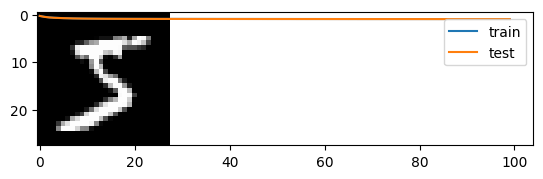

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from matplotlib import pyplot as plt

device = torch.device('cpu')

def accuracy(model, dataloader):
  cnt = 0
  acc = 0

  for data in dataloader:
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)

    preds = model(inputs)
    preds = torch.argmax(preds, dim=-1)

    cnt += labels.shape[0]
    acc += (labels == preds).sum().item()

  return acc / cnt

def plot_acc(train_accs, test_accs, label1='train', label2='test'):
  x = np.arange(len(train_accs))

  plt.plot(x, train_accs, label=label1)
  plt.plot(x, test_accs, label=label2)
  plt.legend()
  plt.show()

# [MYCODE] 데이터 전처리: 이미지를 텐서로 변환하고 정규화
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # MNIST의 평균과 표준편차 적용
])

# [MYCODE] MNIST 데이터셋 불러오기
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

print(f"train_dataset len: {len(train_dataset)}")
print(f"train size: {train_dataset[0][0].shape}")
plt.imshow(train_dataset[0][0][0], cmap='gray')

batch_size = 256

# [MYCODE] train, test에 대한 배치 사이즈에 따른 dataLoader 정의
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

class Model(nn.Module):
    def __init__(self, input_dim, n_dim):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(input_dim, n_dim)
        self.fc2 = nn.Linear(n_dim, n_dim)

        # [MYCODE] 0 ~ 9의 이미지를 분류하기 때문에 10으로 설정
        self.fc3 = nn.Linear(n_dim, 10)

        self.act = nn.ReLU()

    def forward(self, x):
        x = torch.flatten(x, start_dim=1)
        x = self.act(self.fc1(x))
        x = self.act(self.fc2(x))
        x = self.fc3(x)
        return x

model = Model(1 * 28 * 28, 1024).to(device)

lr = 0.001

# [MYCODE] 다중 클래스 분류에서 CrossEntropyLoss 사용
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=lr)

# [MYCODE] 정확도를 매 epoch 타이밍 때 마다 리스트에 저장
train_acc_list = []
test_acc_list = []
num_epochs = 100
for epoch in range(num_epochs):
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch: {epoch:3d} | Lost: {running_loss}")

    train_acc = accuracy(model, dataloader=train_loader)
    train_acc_list.append(train_acc)

    test_acc = accuracy(model, dataloader=test_loader)
    test_acc_list.append(test_acc)


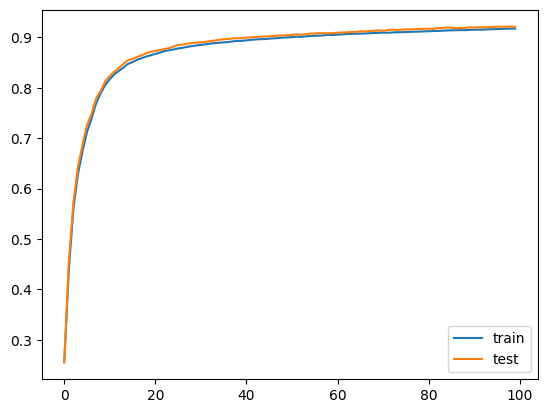

In [2]:
plot_acc(train_accs=train_acc_list, test_accs=test_acc_list)

# [1주차] 심화과제: MNIST 예측 모델에 deep learning techniques 적용하기

Classification model을 MNIST에 적용한 코드에서 다음 부분들을 변경하거나 추가해주시면 됩니다:

- [ ]  Dataset 및 activation 함수 변경
    - Dataset을 MNIST에서 [CIFAR10](https://pytorch.org/vision/stable/generated/torchvision.datasets.CIFAR10.html)으로 변경해줍니다.
    - Activation 함수를 `nn.ReLU`에서 `nn.LeakyReLU`로 변경해줍니다.
    - 학습 인자는 `n_epochs` = 50, `batch_size` = 256로 설정합니다.
- [ ]  CIFAR10의 입력 shape 확인
    - CIFAR10은 MNIST와 다른 입력 shape을 가지고 있습니다.
    - 입력 shape은 model을 선언할 때 중요하기 때문에 MNIST 실습 자료에서 사용한 방식과 똑같이 shape을 확인해주시면 됩니다.
- [ ]  SGD와 Adam 성능 비교
    - 먼저 [Adam optimizer](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html)을 사용하여 학습하는 코드를 구현합니다.
    - (Plot 1) SGD와 Adam을 학습시킨 후 각각의 epoch에 대한 train 정확도를 plot합니다.
- [ ]  Leaky ReLU와 Sigmoid 성능 비교
    - Activation 함수가 `nn.Sigmoid`인 class를 새로 정의합니다.
    - (Plot 2) Adam optimizer를 가지고 sigmoid와 leaky ReLU 모델들을 학습한 후, epoch에 따른 train 정확도를 비교합니다.
- [ ]  Dropout을 적용한 이후의 generalization error 확인
    - PyTorch [dropout](https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html)을 leaky ReLU를 사용하는 MLP의 모든 layer에 적용한 class를 새로 정의합니다. Dropout 확률은 0.1로 설정합니다.
    - 학습 코드에서 다음 부분들을 추가해줍니다:
        - `model.train()`을 `for data in trainloader:` 이전 줄에 둡니다.
        - `trainloader`와 `testloader`에 대한 정확도를 계산하는 코드를 다음과 같이 변경합니다:
            
            ```python
            with torch.no_grad():
              model.eval()
              <기존 정확도 계산 코드>
            ```
            
    - (Plot 3) Adam optimizer를 가지고 dropout을 적용한 모델을 학습한 후, epoch에 따른 train과 test 정확도를 비교합니다.

100%|██████████| 170M/170M [00:04<00:00, 41.2MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
train_dataset len: 50000
train size: torch.Size([3, 32, 32])


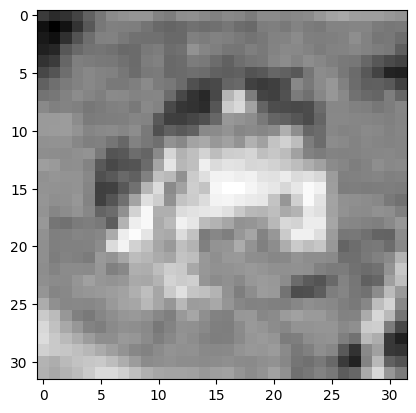

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from matplotlib import pyplot as plt

device = torch.device('cpu')

def plot_acc(first_accs, second_accs, label1='train', label2='test'):
  x = np.arange(len(first_accs))

  plt.plot(x, first_accs, label=label1)
  plt.plot(x, second_accs, label=label2)
  plt.legend()
  plt.show()

# [MYCODE] 데이터 전처리: 이미지를 텐서로 변환하고 정규화
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
])

train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

print(f"train_dataset len: {len(train_dataset)}")
print(f"train size: {train_dataset[0][0].shape}")
plt.imshow(train_dataset[0][0][0], cmap='gray')

batch_size = 256
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# [MYCODE] 10개의 이미지를 분류할 수 있는 모델 생성
class Model(nn.Module):
    def __init__(self, input_dim, n_dim, criterion, act, dropoutProbability = 0.0):
        super(Model, self).__init__()

        self.criterion = criterion

        self.fc1 = nn.Linear(input_dim, n_dim)
        self.fc2 = nn.Linear(n_dim, n_dim)
        self.fc3 = nn.Linear(n_dim, 10)

        self.dropout = nn.Dropout(p=dropoutProbability)
        self.act = act

    def forward(self, x):
        x = torch.flatten(x, start_dim=1)

        x = self.act(self.fc1(x))
        if self.dropout.p > 0.0:
            x = self.dropout(x)

        x = self.act(self.fc2(x))
        if (self.dropout.p > 0.0):
            x = self.dropout(x)

        x = self.fc3(x)
        return x

    def learn(self, num_epochs, train_loader, optimizer):
        acc_list = []

        for epoch in range(num_epochs):
            running_loss = self.__learn_internal(optimizer=optimizer, train_loader=train_loader)
            print(f"Epoch: {epoch:3d} | Lost: {running_loss}")

            acc = self.__accuracy(dataloader=train_loader)
            acc_list.append(acc)

        return acc_list

    def learn_with_test(self, num_epochs, optimizer, train_loader, test_loader):
        train_acc_list = []
        test_acc_list = []

        for epoch in range(num_epochs):
            running_loss = self.__learn_internal(optimizer=optimizer, train_loader=train_loader)
            print(f"Epoch: {epoch:3d} | Lost: {running_loss}")

            train_acc = self.__accuracy(dataloader=train_loader)
            train_acc_list.append(train_acc)

            test_acc = self.__accuracy(dataloader=test_loader)
            test_acc_list.append(test_acc)

        return (train_acc_list, test_acc_list)

    def __learn_internal(self, optimizer, train_loader):
        running_loss = 0.0
        if self.dropout.p > 0.0:
            self.train()

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()

            outputs = self(inputs)
            loss = self.criterion(outputs, labels)
            loss.backward()

            optimizer.step()

            running_loss += loss.item()

        return running_loss

    def __accuracy(self, dataloader):
        cnt = 0
        acc = 0

        if self.dropout.p > 0.0:
           self.dropout.eval()

        with torch.no_grad():
            for data in dataloader:
                inputs, labels = data
                inputs, labels = inputs.to(device), labels.to(device)

                preds = self(inputs)
                preds = torch.argmax(preds, dim=-1)

                cnt += labels.shape[0]
                acc += (labels == preds).sum().item()

        return acc / cnt

# [MYCODE] epochs, input_dim 적절한 값으로 조정
lr = 0.001
num_epochs = 50
criterion = nn.CrossEntropyLoss()
input_dim = 3 * 32 * 32

Epoch:   0 | Lost: 449.47760677337646
Epoch:   1 | Lost: 445.850013256073
Epoch:   2 | Lost: 442.29927945137024
Epoch:   3 | Lost: 438.7217297554016
Epoch:   4 | Lost: 435.0110957622528
Epoch:   5 | Lost: 431.2229890823364
Epoch:   6 | Lost: 427.3714714050293
Epoch:   7 | Lost: 423.5003550052643
Epoch:   8 | Lost: 419.7159221172333
Epoch:   9 | Lost: 416.09227776527405
Epoch:  10 | Lost: 412.6456391811371
Epoch:  11 | Lost: 409.2938416004181
Epoch:  12 | Lost: 406.2396538257599
Epoch:  13 | Lost: 403.2073711156845
Epoch:  14 | Lost: 400.2281656265259
Epoch:  15 | Lost: 397.4853392839432
Epoch:  16 | Lost: 394.90538585186005
Epoch:  17 | Lost: 392.2841387987137
Epoch:  18 | Lost: 389.9474002122879
Epoch:  19 | Lost: 387.4313099384308
Epoch:  20 | Lost: 385.26748871803284
Epoch:  21 | Lost: 383.12019860744476
Epoch:  22 | Lost: 380.9403820037842
Epoch:  23 | Lost: 378.8979539871216
Epoch:  24 | Lost: 377.0343806743622
Epoch:  25 | Lost: 375.0896147489548
Epoch:  26 | Lost: 373.2485463619

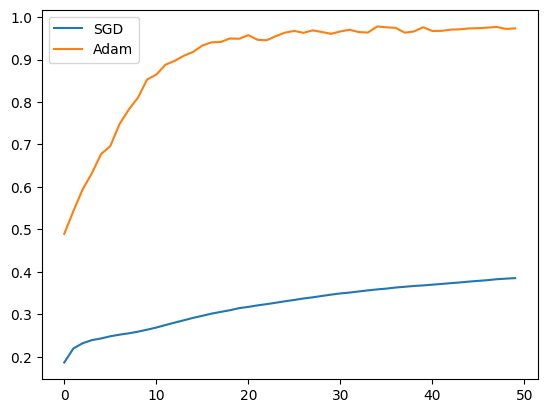

In [4]:
# [MYCODE] SGD, Adam 간의 정확도 비교
act = nn.ReLU()
model = Model(input_dim=input_dim, n_dim=1024, criterion=criterion, act=act).to(device)

optimizer = optim.SGD(params=model.parameters(), lr=lr)
sgd_acc_list = model.learn(num_epochs=num_epochs, train_loader=train_loader, optimizer=optimizer)

optimizer = optim.Adam(params=model.parameters(), lr=lr)
adam_acc_list = model.learn(num_epochs=num_epochs, train_loader=train_loader, optimizer=optimizer)

plot_acc(first_accs=sgd_acc_list, second_accs=adam_acc_list, label1="SGD", label2="Adam")

Epoch:   0 | Lost: 320.55461859703064
Epoch:   1 | Lost: 273.9337965250015
Epoch:   2 | Lost: 249.69027030467987
Epoch:   3 | Lost: 228.77776843309402
Epoch:   4 | Lost: 208.9752744436264
Epoch:   5 | Lost: 187.44580560922623
Epoch:   6 | Lost: 167.01446586847305
Epoch:   7 | Lost: 147.63749998807907
Epoch:   8 | Lost: 126.6887498497963
Epoch:   9 | Lost: 108.53017580509186
Epoch:  10 | Lost: 91.14189636707306
Epoch:  11 | Lost: 76.71057593822479
Epoch:  12 | Lost: 66.56292343139648
Epoch:  13 | Lost: 60.23316502571106
Epoch:  14 | Lost: 51.10922786593437
Epoch:  15 | Lost: 47.13206726312637
Epoch:  16 | Lost: 39.00515080243349
Epoch:  17 | Lost: 37.97703567147255
Epoch:  18 | Lost: 38.20671754330397
Epoch:  19 | Lost: 33.66826944798231
Epoch:  20 | Lost: 32.81571505218744
Epoch:  21 | Lost: 31.55431842058897
Epoch:  22 | Lost: 30.60960527136922
Epoch:  23 | Lost: 30.878181599080563
Epoch:  24 | Lost: 27.16632065922022
Epoch:  25 | Lost: 29.36428925395012
Epoch:  26 | Lost: 24.64544522

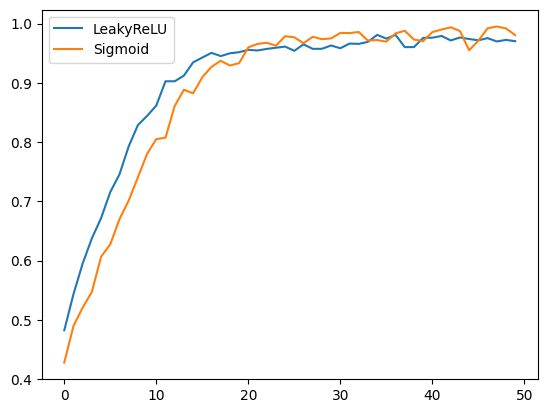

In [5]:
# [MYCODE] 활성화 함수 LeakyReLU, Sigmoid 간의 정확도 비교
act = nn.LeakyReLU()
model = Model(input_dim=input_dim, n_dim=1024, criterion=criterion, act=act).to(device)
optimizer = optim.Adam(params=model.parameters(), lr=lr)
leakyReLU_acc_list = model.learn(num_epochs=num_epochs, train_loader=train_loader, optimizer=optimizer)

act = nn.Sigmoid()
model = Model(input_dim=input_dim, n_dim=1024, criterion=criterion, act=act).to(device)
optimizer = optim.Adam(params=model.parameters(), lr=lr)
sigmoid_acc_list = model.learn(num_epochs=num_epochs, train_loader=train_loader, optimizer=optimizer)

plot_acc(first_accs=leakyReLU_acc_list, second_accs=sigmoid_acc_list, label1="LeakyReLU", label2="Sigmoid")

In [ ]:
# [MYCODE] dropout 적용한 train, test 데이터간의 정확도 비교
act = nn.LeakyReLU()
model = Model(input_dim=input_dim, n_dim=1024, criterion=criterion, act=act, dropoutProbability=0.1).to(device)
optimizer = optim.Adam(params=model.parameters(), lr=lr)
train_acc_list, test_acc_list = model.learn_with_test(num_epochs=num_epochs, optimizer=optimizer, train_loader=train_loader, test_loader=test_loader)

plot_acc(first_accs=train_acc_list, second_accs=test_acc_list, label1="Train", label2="Test")

Epoch:   0 | Lost: 322.53387439250946
Epoch:   1 | Lost: 281.09561789035797
Epoch:   2 | Lost: 259.1189204454422
Epoch:   3 | Lost: 240.32948052883148
Epoch:   4 | Lost: 225.21720778942108
Epoch:   5 | Lost: 209.70046722888947
Epoch:   6 | Lost: 193.97877997159958
Epoch:   7 | Lost: 179.14108055830002
Epoch:   8 | Lost: 166.54611843824387
Epoch:   9 | Lost: 151.10660976171494
Epoch:  10 | Lost: 139.59940439462662
Epoch:  11 | Lost: 126.46024346351624
Epoch:  12 | Lost: 114.63326400518417
Epoch:  13 | Lost: 105.91238129138947
Epoch:  14 | Lost: 97.67401546239853
